In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from pygame import mixer

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
# model = load_model(r"C:\Users\DELL\Desktop\Major Project\model\my_model.keras")
# model = load_model(r"C:\Users\DELL\Desktop\Major Project\model\my_modelVGG16.keras")
# model = load_model(r"C:\Users\DELL\Desktop\Major Project\model\my_modelInceptionV3.keras")
model = load_model(r"C:\Users\DELL\Desktop\Major Project\model\my_modelResNet50.keras")

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 434 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
[[4.371981e-04 9.995628e-01]]


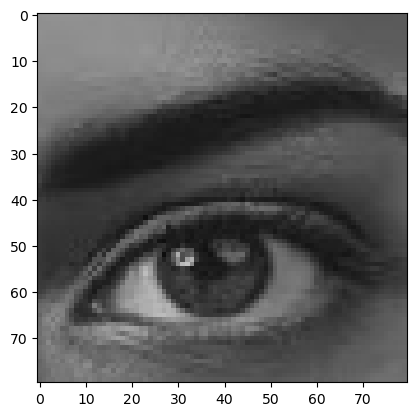

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_array = cv2.imread(r"C:\Users\DELL\Desktop\alert drowsiness\dataset\Open\_94.jpg", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (80, 80))

y_input = np.array(new_array).reshape(1, 80, 80, 3)

y_input.shape

plt.imshow(new_array)

y_input = y_input/255.0

prediction = model.predict(y_input)
# prediction2 = model1.predict(y_input)

print(prediction)
# print(prediction2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[[0.82357687 0.1764231 ]]


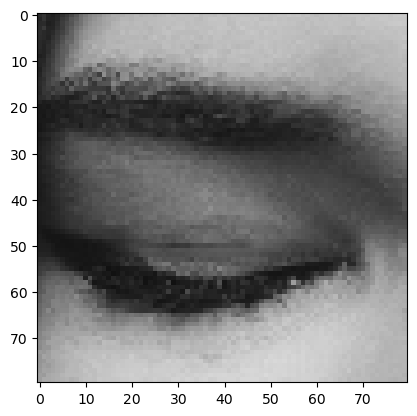

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_array = cv2.imread(r"C:\Users\DELL\Desktop\alert drowsiness\dataset\Closed\_80.jpg", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (80, 80))

y_input = np.array(new_array).reshape(1, 80, 80, 3)

y_input.shape

plt.imshow(new_array)

y_input = y_input/255.0

prediction = model.predict(y_input)
# prediction2 = model1.predict(y_input)

print(prediction)
# print(prediction2)

In [ ]:
mixer.init()
sound = mixer.Sound(r'C:\Users\DELL\Desktop\Major Project\alarm.wav')
cap = cv2.VideoCapture(0)
Score = 0
while True:
    ret, frame = cap.read()
    height, width = frame.shape[0:2]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.2, minNeighbors = 3)
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor = 1.2, minNeighbors = 1)

    cv2.rectangle(frame, (0,height-50), (200,height), (0,0,0), thickness = cv2.FILLED)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, pt1 = (x,y),pt2 = (x+w,y+h), color = (255,0,0), thickness = 3)

    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(frame, pt1 = (ex,ey),pt2 = (ex+ew,ey+eh), color = (255,0,0), thickness = 3)
        eye = frame[ey:ey+eh, ex:ex+ew]
        eye = cv2.resize(eye,(80,80))
        eye = eye/255
        eye = eye.reshape(80,80,3)
        eye = np.expand_dims(eye, axis = 0)
        prediction = model.predict(eye)
        # for cnn = 0.02.... for inceptionv3 0.3.....for resNet 0.6 and score 3....for VGG16...0.5
        if prediction[0][0]<0.3:
            cv2.putText(frame, 'closed', (10,height-20), fontFace = cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale = 1,color = (255,255,255),
                        thickness = 1, lineType = cv2.LINE_AA)
            cv2.putText(frame,'Score' + str(Score), (100,height-20), fontFace = cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale= 1, color = (255,255,255),
                        thickness = 1, lineType = cv2.LINE_AA)
            Score = Score + 1
            
            if(Score >3):
                try:
                    sound.play()
                except:
                    pass

        
        elif prediction[0][1] > 0.90:
            cv2.putText(frame, 'open', (10,height-20), fontFace = cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale = 1, color = (255,255,255),
                        thickness = 1, lineType = cv2.LINE_AA)
            cv2.putText(frame,'Score' + str(Score), (100,height-20), fontFace = cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale= 1, color = (255,255,255),
                        thickness = 1, lineType = cv2.LINE_AA)
            Score = Score -1
            if (Score < 0):
                Score = 0

    cv2.imshow('frame', frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
